In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import json
from pprint import pprint
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
%matplotlib inline

In [2]:
with open("datasets/wine/wine_train.json") as json_data:
    dataset = json.load(json_data)

In [3]:
class_list = list(set(dataset["target"]))

In [4]:
x_data = np.asarray(dataset["attribs"])
y_data = np.asarray(dataset["target"])

In [5]:

train_index=[]
test_index=[]
splits =10
skf = StratifiedKFold(n_splits=splits,random_state=0,shuffle=True)
for train_idx, test_idx in skf.split(x_data,y_data):               
    train_index.append(train_idx)
    test_index.append(test_idx)

In [6]:

def plot_confusion_matrix(cm, classes, title,classifier_name):
    plt.rcParams.update({'font.size': 18})
    fig,ax= plt.subplots(figsize=(5,4))
    sns.set(font_scale=1.5)
    sns_plot = sns.heatmap(cm, annot=True, ax = ax, cmap="Blues"); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title(title); 
    ax.xaxis.set_ticklabels(classes); ax.yaxis.set_ticklabels(classes);
    #fig.savefig(classifier_name+".png")

In [7]:

def classiferTest(classifier,classifier_name,print_cfm,splits =5):
    if print_cfm:
        print(classifier_name)
    train_score = np.zeros(splits)
    validate_score = np.zeros(splits)
    cm = np.zeros([3,3,splits])
    for c in range(splits):
        X_train = x_data[train_index[c]]
        y_train = y_data[train_index[c]]
        X_test = x_data[test_index[c]]
        y_test = y_data[test_index[c]]
        classifier.fit(X_train,y_train)
        train_score[c] = classifier.score(X_train,y_train)
        validate_score[c] = classifier.score(X_test,y_test)
        y_pred = classifier.predict(X_test)
        cm[:,:,c] = confusion_matrix(y_test, y_pred)
    print(cm.mean(axis=2))
    print("%6.3f\t%6.3f\t%6.3f\t%6.3f" % (np.average(train_score),np.std(train_score),np.average(validate_score),np.std(validate_score)))
    cm = cm.astype('float')*10000 / cm.sum(axis=1)[:, np.newaxis]
    cm = np.nan_to_num(cm, copy=True)
    cm = cm.astype('int')
    cm = cm.mean(axis=2)
    return cm*0.01
    

In [8]:
def get_code(tree, feature_names, target_names,
             spacer_base="    "):
    """Produce psuedo-code for decision tree.
    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)


Metabolism-DecisionTreeClassifier-entropy-depth3
[[4.6 0.4 0. ]
 [0.8 4.8 0.4]
 [0.2 0.  3.8]]
 0.950	 0.008	 0.880	 0.027


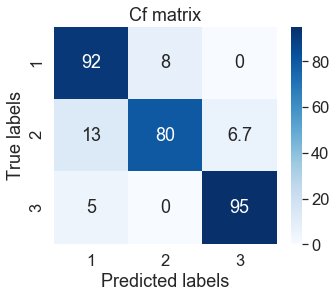

In [13]:
from sklearn.tree import DecisionTreeClassifier
cf = classiferTest(DecisionTreeClassifier(random_state=0,max_depth=2, criterion='entropy'),"Metabolism-DecisionTreeClassifier-entropy-depth3",True)

plot_confusion_matrix(cf,[1,2,3],"Cf matrix","wine")

array([[11,  1,  0],
       [ 0, 14,  0],
       [ 0,  0, 10]])

if ( Falvanoids <= 0.3632352948188782 ) {
    if ( Color_intensity <= 0.21715017408132553 ) {
        return 2 ( 12 examples )
    }
    else {
        return 2 ( 1 examples )
        return 3 ( 38 examples )
    }
}
else {
    if ( Proline <= 0.3609539121389389 ) {
        return 1 ( 1 examples )
        return 2 ( 40 examples )
    }
    else {
        return 1 ( 46 examples )
        return 2 ( 4 examples )
    }
}


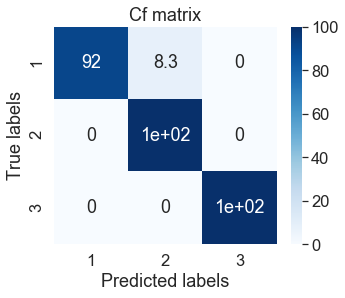

In [14]:
with open("datasets/wine/wine_test.json") as json_data:
    dataset = json.load(json_data)
x_test = np.asarray(dataset["attribs"])
y_test = np.asarray(dataset["target"])
classifier = DecisionTreeClassifier(random_state=0,max_depth=2, criterion='entropy')
classifier.fit(x_data,y_data)
train_score= classifier.score(x_data,y_data)
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
pprint(cm)
print()
get_code(classifier,dataset["attribs_labels"], class_list)
cm = cm.astype('float')*10000 / cm.sum(axis=1)[:, np.newaxis]
cm = np.nan_to_num(cm, copy=True)
cm = cm.astype('int')
cm= cm*0.01
plot_confusion_matrix(cm,[1,2,3],"Cf matrix","wine")